In [171]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format='retina'

## Univariate Variable Approach
We specifically have a model in which $y$ is a function of $X$. I.e. we are mapping from 1 dimensional reals to 1 dimensional reals. Currently our model is simply mapping $X$ to $Y$, plus some gaussian distributed noise:

$$f : X \rightarrow Y$$

$$f(x) = x + \mathcal{N}(\mu=0, \sigma^2 = 1)$$

In [206]:
x = np.arange(-1, 1, 0.001)
epsilon = np.random.normal(scale=0.5, size=len(x))
y = x + epsilon

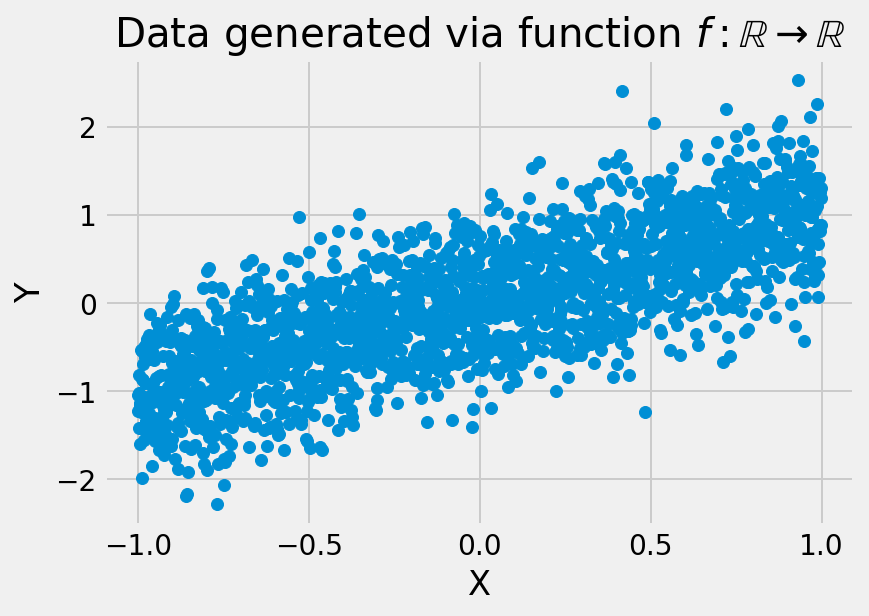

In [207]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r'Data generated via function $f: \mathbb{R} \rightarrow \mathbb{R}$')
plt.show()

In [188]:
X = np.stack((x,y))

In [189]:
X.shape

(2, 2000)

In [190]:
cov = np.cov(X)
cov

array([[0.3335    , 0.33618049],
       [0.33618049, 0.58881164]])

In [192]:
corr = np.corrcoef(X)
corr

array([[1.        , 0.75864114],
       [0.75864114, 1.        ]])

## Linear Transformation Approach

In [212]:
x = np.arange(-5, 5, 0.5)
x, y = np.meshgrid(x, x)

x = x.flatten()
y = y.flatten()

X = np.stack((x,y))

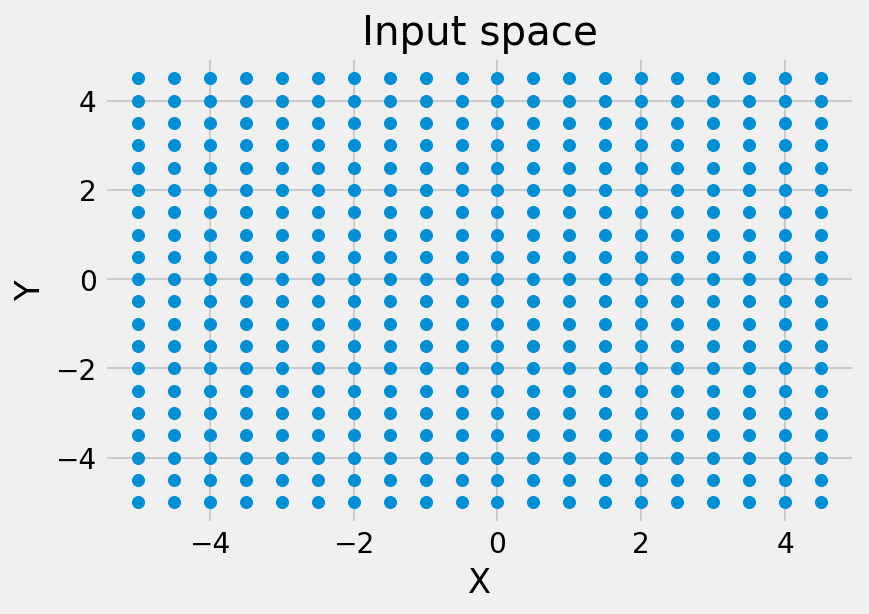

In [213]:
plt.scatter(X[0, :], X[1, :])
plt.title('Input space')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

$$\begin{bmatrix} 0.3335 \;\; 0.3293 \\ 0.3293 \;\; 0.5703 \\ \end{bmatrix}$$

In [155]:
# cov = cov
cov = np.array(
    [[0.3335    , 0.32935475],
    [0.32935475, 0.57032378]]
)

np.

In [219]:
# X_transformed = cov.dot(X)
X_transformed = cov.dot(X)
epsilon2 = np.random.normal(scale=0.5, size=len(X_transformed[0, :]))
epsilon3 = np.random.normal(scale=0.5, size=len(X_transformed[1, :]))

In [ ]:
# plt.scatter(X_transformed[0, :], X_transformed[1, :])

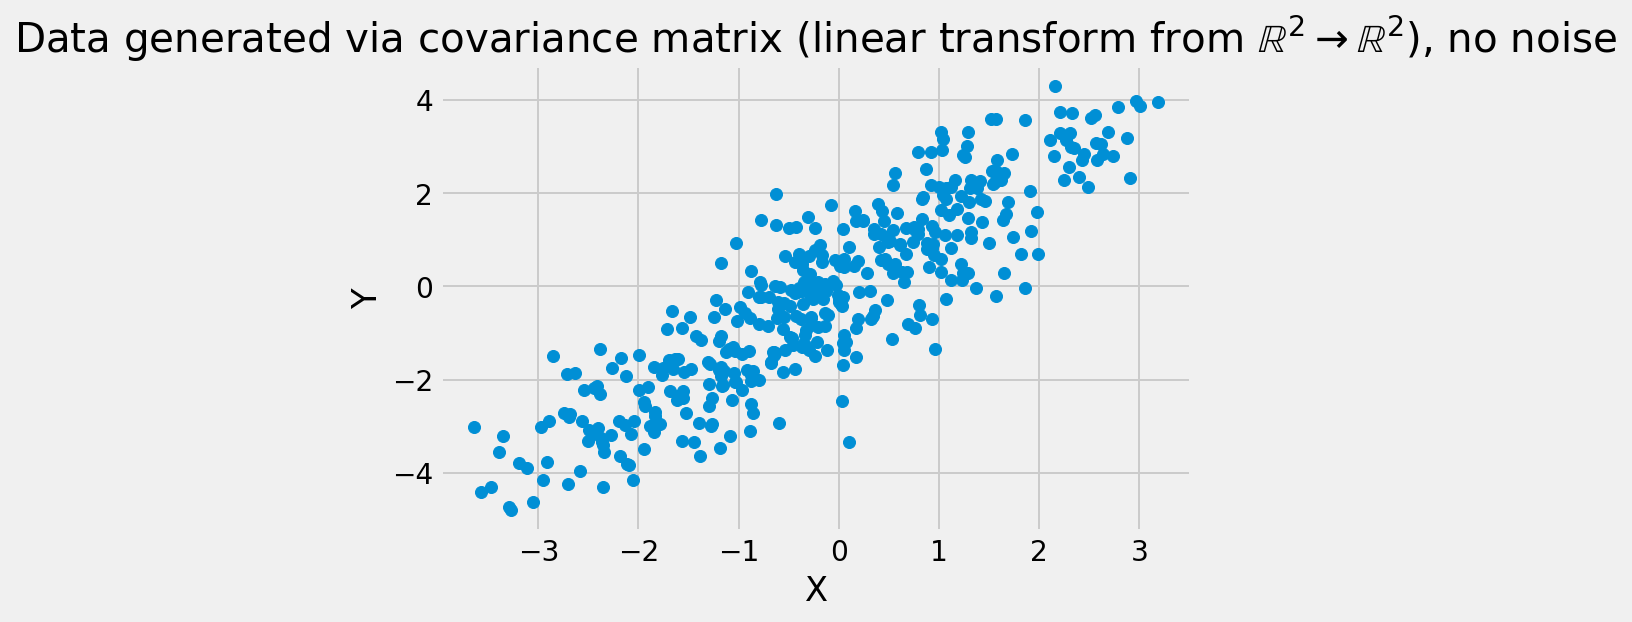

In [223]:
x = np.arange(-5, 5, 0.5)
x, y = np.meshgrid(x, x)

x = x.flatten()
y = y.flatten()
X = np.stack((x,y))

epsilon2 = np.random.normal(scale=0.5, size=len(X_transformed[0, :]))
epsilon3 = np.random.normal(scale=0.5, size=len(X_transformed[1, :]))

plt.scatter(X_transformed[0, :] + epsilon2, X_transformed[1, :] + epsilon3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r'Data generated via covariance matrix (linear transform from $\mathbb{R}^2 \rightarrow \mathbb{R}^2$), no noise')
plt.show()

### Compare
The question now is to identify a specific data point and think about how it was created/its mapping process.

For instance, in the univariate model we have $x=2$ being mapped to $y=2$ + noise. However, the expected value of the noise is $0$, so we can just say $2$ is mapped to $2$. So, our input space is truly $\mathbb{R}$, we map to $\mathbb{R}$, and we visualize these axis as orthogonal (x and y), allowing us to plot nicely. So, clearly put, if we want to investigate a specific mapping, we see that:

$$2 \rightarrow 2 + \epsilon$$

Now, in the 2 dimensional linear transformation model, our input space is $\mathbb{R} \times \mathbb{R}$, i.e. $\mathbb{R}^2$. So here we take a given two dimensional point (vector) and map it to another two dimensional point, via the mapping $cov$. Now, we know that a resulting point from our 1 dimensional model will be the vector  $\begin{bmatrix} 2 \\ 2 \\ \end{bmatrix}$. What vector in the input space did $cov$ move to get there?

In [160]:
cov_inv = np.linalg.inv(cov)

In [162]:
cov

array([[0.3335    , 0.32935475],
       [0.32935475, 0.57032378]])

In [165]:
v_post_cov = np.array([[2], [2]])

In [167]:
v_pre_cov = cov_inv.dot(v_post_cov)
v_pre_cov

array([[5.89682274],
       [0.10143961]])

In [168]:
cov.dot(v_pre_cov)

array([[2.],
       [2.]])

In [169]:
w_pre_cov = np.array([[2], [2]])

In [170]:
cov.dot(w_pre_cov)

array([[1.3257095 ],
       [1.79935706]])

400

In [40]:
transformed_x = []
transformed_y = []

for x_val in X[0]:
    for y_val in X[0]:
        vec_transformed = cov.dot(np.array([x_val, y_val]))
        transformed_x.append(vec_transformed[0])
        transformed_y.append(vec_transformed[1])

In [50]:
transformed_X = cov.dot(X)

In [45]:
np.array(transformed_x).shape

(1000000,)

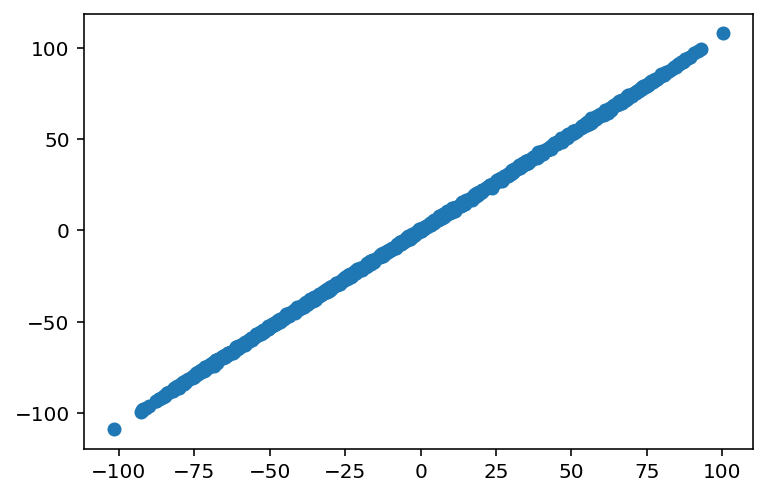

In [52]:
plt.scatter(transformed_X[0, :], transformed_X[1, :])

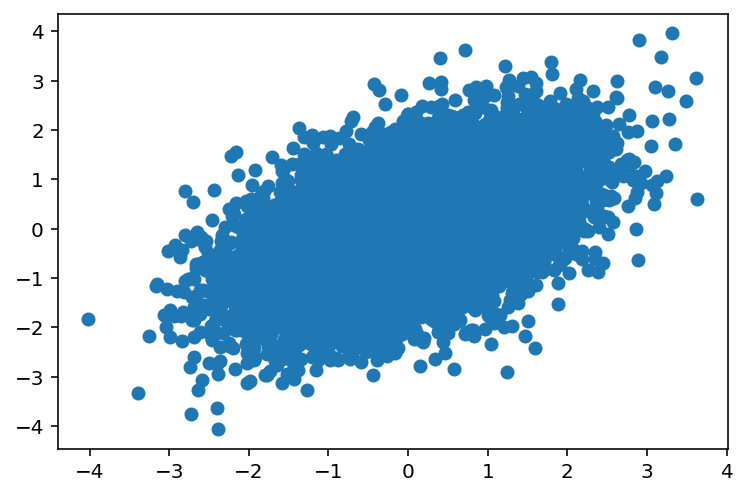

In [67]:
mean = np.array([0, 0])
cov = np.array([
    [1, 0.5], [0.5, 1]
])

res = np.random.multivariate_normal(mean, cov, 10000)
X = res[:, 0]
Y = res[:, 1]

plt.scatter(X, Y)

In [68]:
# X = np.stack((X, Y))

In [69]:
eps = 0.01
mask_around_1 = ((X > 1 - eps) & (X < 1 + eps))

In [71]:
X_at_1 = X[mask_around_1]
Y_at_1 = Y[mask_around_1]

In [73]:
Y_at_1.mean()

0.5577454648545398

In [74]:
Y_at_1.var()

0.8306734126530562

In [79]:
# plt.hist(Y_at_1, bins=20)

On average, we can think of having a function, $f$ that maps $x=1$ to $y=0.5577$, on average. More formally:

$$f(x=1) = N(\mu=0.5577, \sigma^2 = 0.83)$$

Now, given cov, what vector did it map to $\begin{bmatrix} 1 \\ 0.5577 \\ \end{bmatrix}$?

In [83]:
cov_inv = np.linalg.inv(cov)

In [91]:
x_post = np.array([[1], [0.5577]])

In [92]:
x_post

array([[1.    ],
       [0.5577]])

In [93]:
x.shape

(2, 1)

In [94]:
x_pre = cov_inv.dot(x)

In [95]:
x_post_check = cov.dot(x_pre)

In [98]:
assert np.array_equal(x_post, x_post_check)